In [14]:
!pip install requests pandas matplotlib seaborn geopandas folium


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from datetime import datetime

- Step 1: Register and obtain an API key from OpenWeatherMap

In [16]:
API_KEY = '0d301a8ea3e07204503213f0ffd60098' 

- Step 2: Interact with the OpenWeatherMap API to retrieve weather data for a specific location

In [17]:
location = 'Pune,IN'  # Specify your location (City, Country code)
url = f'http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={API_KEY}&units=metric'

response = requests.get(url)
weather_data = response.json()

- Step 3: Extract relevant weather attributes

In [18]:
data_list = weather_data['list']
weather_df = pd.DataFrame([{
    'datetime': datetime.fromtimestamp(item['dt']),
    'temperature': item['main']['temp'],
    'humidity': item['main']['humidity'],
    'wind_speed': item['wind']['speed'],
    'weather_description': item['weather'][0]['description']
} for item in data_list])


- Step 4: Clean and preprocess the data

In [19]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])
weather_df.set_index('datetime', inplace=True)

- Step 5: Perform data modeling (analyzing weather patterns)

In [20]:
weather_df['temp_max'] = weather_df['temperature'].rolling(window=3).max()
weather_df['temp_min'] = weather_df['temperature'].rolling(window=3).min()
weather_df['temp_avg'] = weather_df['temperature'].rolling(window=3).mean()

- Step 6: Visualize the weather data

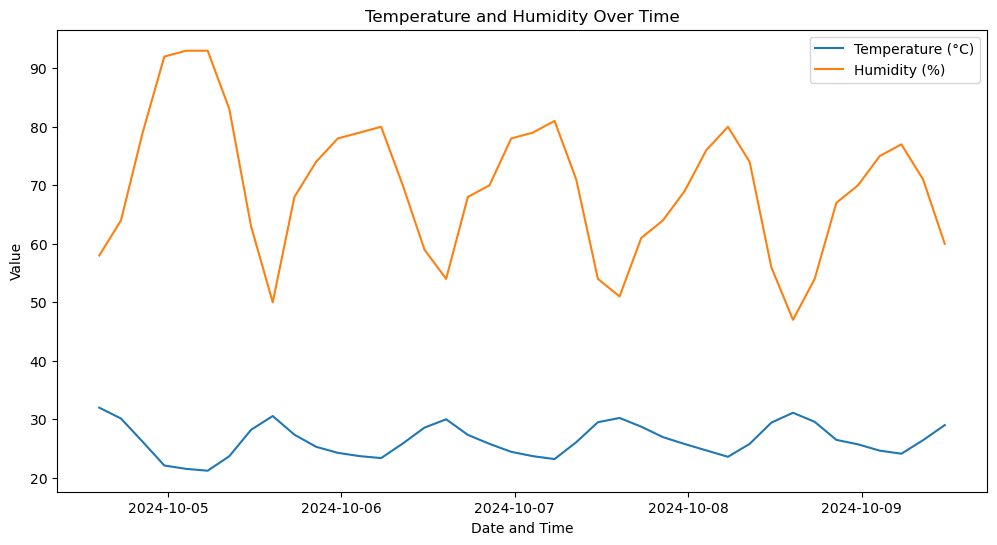

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_df, x=weather_df.index, y='temperature', label='Temperature (°C)')
sns.lineplot(data=weather_df, x=weather_df.index, y='humidity', label='Humidity (%)')
plt.title('Temperature and Humidity Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.legend()
plt.show()

- Step 7: Data aggregation to summarize weather statistics

In [22]:
daily_weather = weather_df.resample('D').agg({
    'temperature': ['mean', 'max', 'min'],
    'humidity': 'mean',
    'wind_speed': 'mean'
})
daily_weather.columns = ['_'.join(col).strip() for col in daily_weather.columns.values]

- Visualize the aggregated data

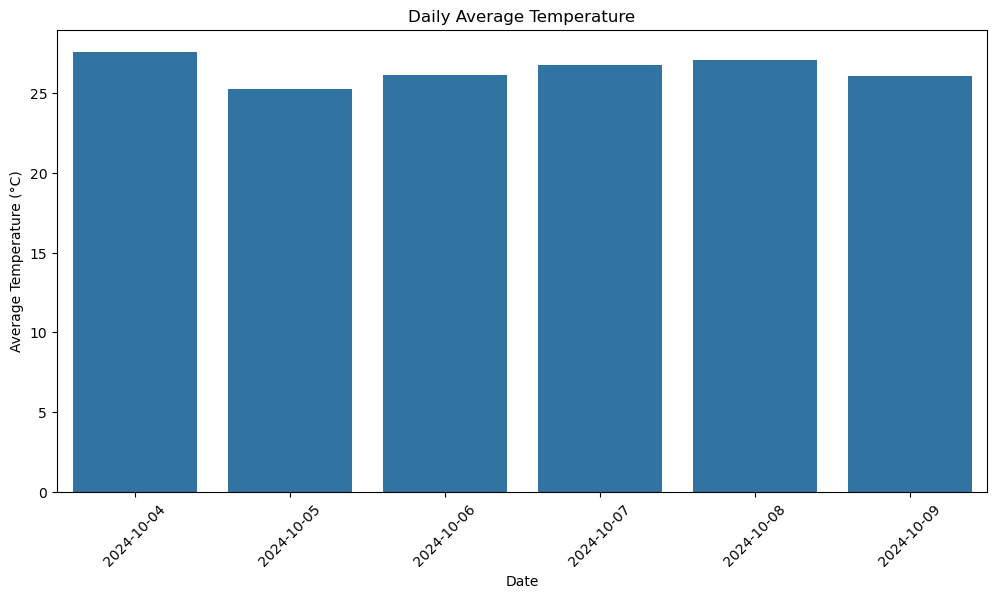

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_weather.reset_index(), x='datetime', y='temperature_mean')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

- Step 8: Incorporate geographical information (if available)

In [24]:
# Assuming latitude and longitude are available for the location
latitude, longitude = weather_data['city']['coord']['lat'], weather_data['city']['coord']['lon']

map_weather = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.Marker([latitude, longitude], popup=f'Weather in {location}').add_to(map_weather)
map_weather


- Step 9: Explore and visualize relationships between weather attributes

<function matplotlib.pyplot.show(close=None, block=None)>

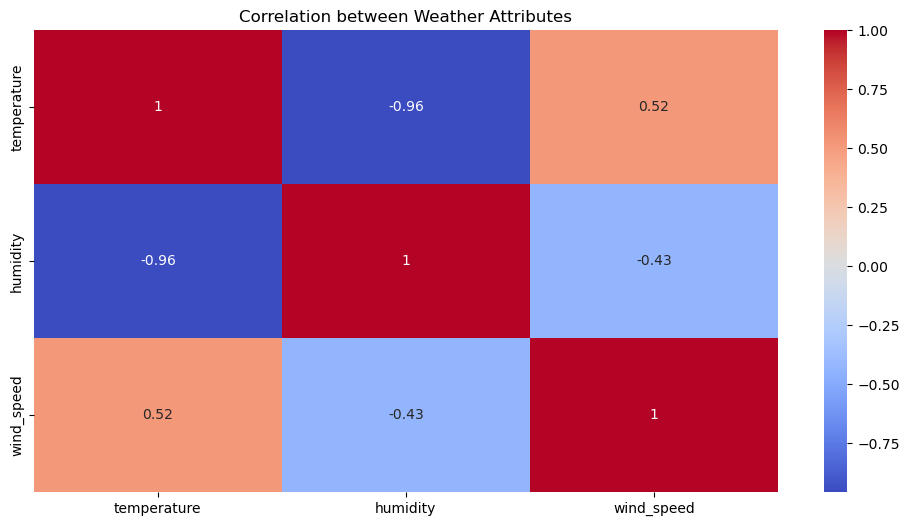

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(weather_df[['temperature', 'humidity', 'wind_speed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Weather Attributes')
plt.show